# **Import Packages & Library**

In [45]:
import pyforest
import dtale
import glob
import matplotlib.dates as mdates

# **Reading Dataset**

In [105]:
df =  pd.read_csv("https://raw.githubusercontent.com/NaliaGK/Data-Knights/main/ASEAN%201991-%202020.csv").fillna(0).sort_values(by='Year')
df['Commodity'] = df['Commodity Code'].map({8703:"Motor Cars",
                        1511:"Palm Oil",
                        7108:"Gold",
                        4402:"Charcoal",
                        4001:"Rubber"})
df

<IPython.core.display.Javascript object>

,Unnamed: 0,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,0,H0,1991,1991,1991,4,0,1,Import,360,...,24903404.0,0.0,0.0,0.0,24903404.0,0.0,8935041,0.0,0.0,0
71,71,H0,1991,1991,1991,4,0,1,Import,360,...,2500.0,0.0,0.0,0.0,2500.0,0.0,31966,0.0,0.0,0
70,70,H0,1991,1991,1991,4,0,2,Export,360,...,40773.0,0.0,0.0,0.0,40773.0,0.0,244824,0.0,0.0,0
69,69,H0,1991,1991,1991,4,0,1,Import,360,...,3000.0,0.0,0.0,0.0,3000.0,0.0,18011,0.0,0.0,0
68,68,H0,1991,1991,1991,4,0,2,Export,360,...,390546.0,0.0,0.0,0.0,390546.0,0.0,2018293,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,1003,H5,2020,2020,2020,4,0,1,Import,360,...,7020.0,0.0,0.0,0.0,7020.0,0.0,392212350,0.0,0.0,6
1004,1004,H5,2020,2020,2020,4,0,2,Export,360,...,50435.0,0.0,0.0,0.0,50435.0,0.0,2764893686,0.0,0.0,0
1005,1005,H5,2020,2020,2020,4,0,1,Import,360,...,6.0,0.0,0.0,0.0,6.0,0.0,151575,0.0,0.0,0
985,985,H5,2020,2020,2020,4,0,2,Export,360,...,8167409.0,0.0,0.0,0.0,8167409.0,0.0,3212184,0.0,0.0,0


## **Dtale**

In [47]:
df_dtale = dtale.show(df, open_browser=True, subprocess=False )
df_dtale

# **Pertumbuhan Export-Import Total Komoditas Indonesia Intra ASEAN 1991-2020**

In [ ]:
df_konten2 = df.groupby(['Trade Flow','Year']).sum().reset_index()
df_konten2.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

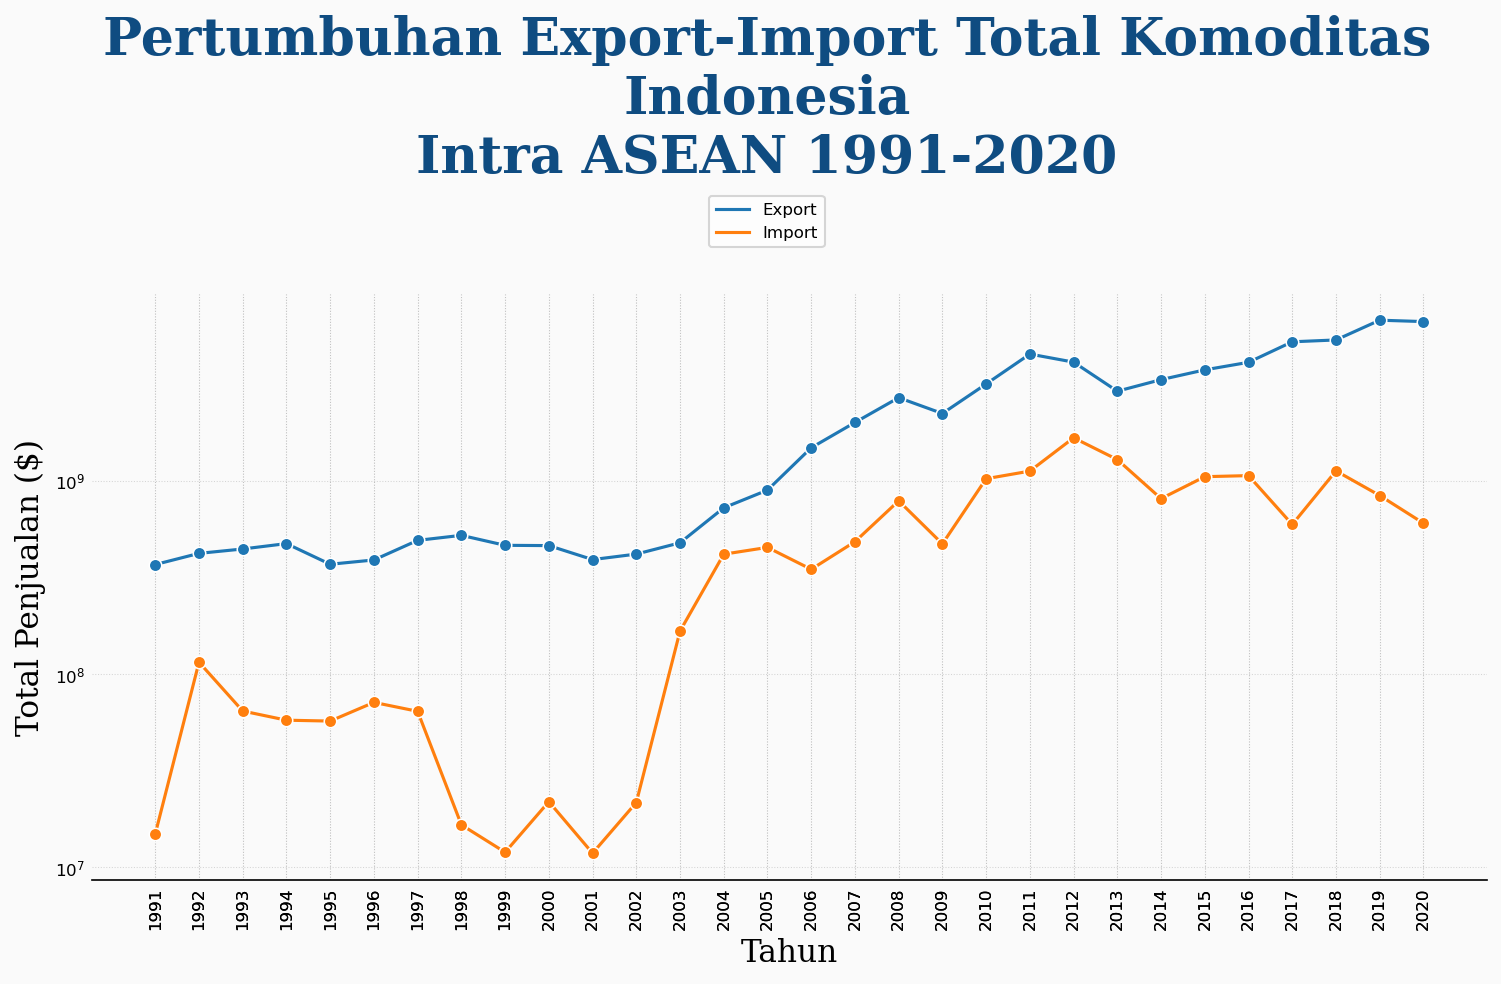

In [102]:
fig = plt.figure(figsize = (12,12), dpi=150, facecolor='#fafafa')
gs = fig.add_gridspec(4,3)
gs.update(wspace=0.2, hspace=0.35)

#plot 1
ax1 = fig.add_subplot(gs[0:2,0:8])
plot = sns.lineplot(data=df_konten2, x='Year', y='Trade Value (US$)', hue='Trade Flow', ax=ax1, marker='o')
ax1.set_facecolor("#fafafa")
ax1.set_ylabel('Total Penjualan ($)', fontfamily='serif', fontsize=15)
ax1.set_xlabel('Tahun', fontfamily='serif', fontsize=15)
ax1.tick_params(axis=u'both', which=u'both', length=0, labelsize=8)
plt.xticks(df_konten2['Year'])
plt.xticks(rotation='vertical')
plt.yscale('log')
plt.grid(alpha=0.5, linestyle=':', linewidth=0.5)
ax1.legend().set_visible(False)

for sp in ['top', 'right', 'left']:
    ax1.spines[sp].set_visible(False)

fig.suptitle('Pertumbuhan Export-Import Total Komoditas\nIndonesia\nIntra ASEAN 1991-2020', fontsize=25, fontweight='bold', fontfamily='serif',color='#0f4c81')
fig.subplots_adjust(top=0.825)
fig.legend(loc='center', bbox_to_anchor=(0.5,0.865), prop={'size':8})

plt.show()

# **Pertumbuhan Export-Import 5 Komoditas Indonesia Intra ASEAN 1991-2020**

In [103]:
df_konten3 = df.groupby(['Trade Flow','Commodity','Year']).sum().reset_index()
df_konten3.head()

,Trade Flow,Commodity,Year,Unnamed: 0,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Reporter Code,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,Export,Charcoal,2001,1065,8004,8004,16,0,8,1440,...,21181463.0,0.0,0.0,0.0,21181463.0,0.0,2115088,0.0,0.0,0
1,Export,Charcoal,2002,1508,10010,10010,20,0,10,1800,...,22684629.0,0.0,0.0,0.0,22684629.0,0.0,2230591,0.0,0.0,0
2,Export,Charcoal,2003,1678,10015,10015,20,0,10,1800,...,30336335.0,0.0,0.0,0.0,30336335.0,0.0,4090892,0.0,0.0,0
3,Export,Charcoal,2004,2301,12024,12024,24,0,12,2160,...,27094637.0,0.0,0.0,0.0,27094637.0,0.0,3724802,0.0,0.0,0
4,Export,Charcoal,2005,1629,8020,8020,16,0,8,1440,...,30970378.0,0.0,0.0,0.0,30970378.0,0.0,4006578,0.0,0.0,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

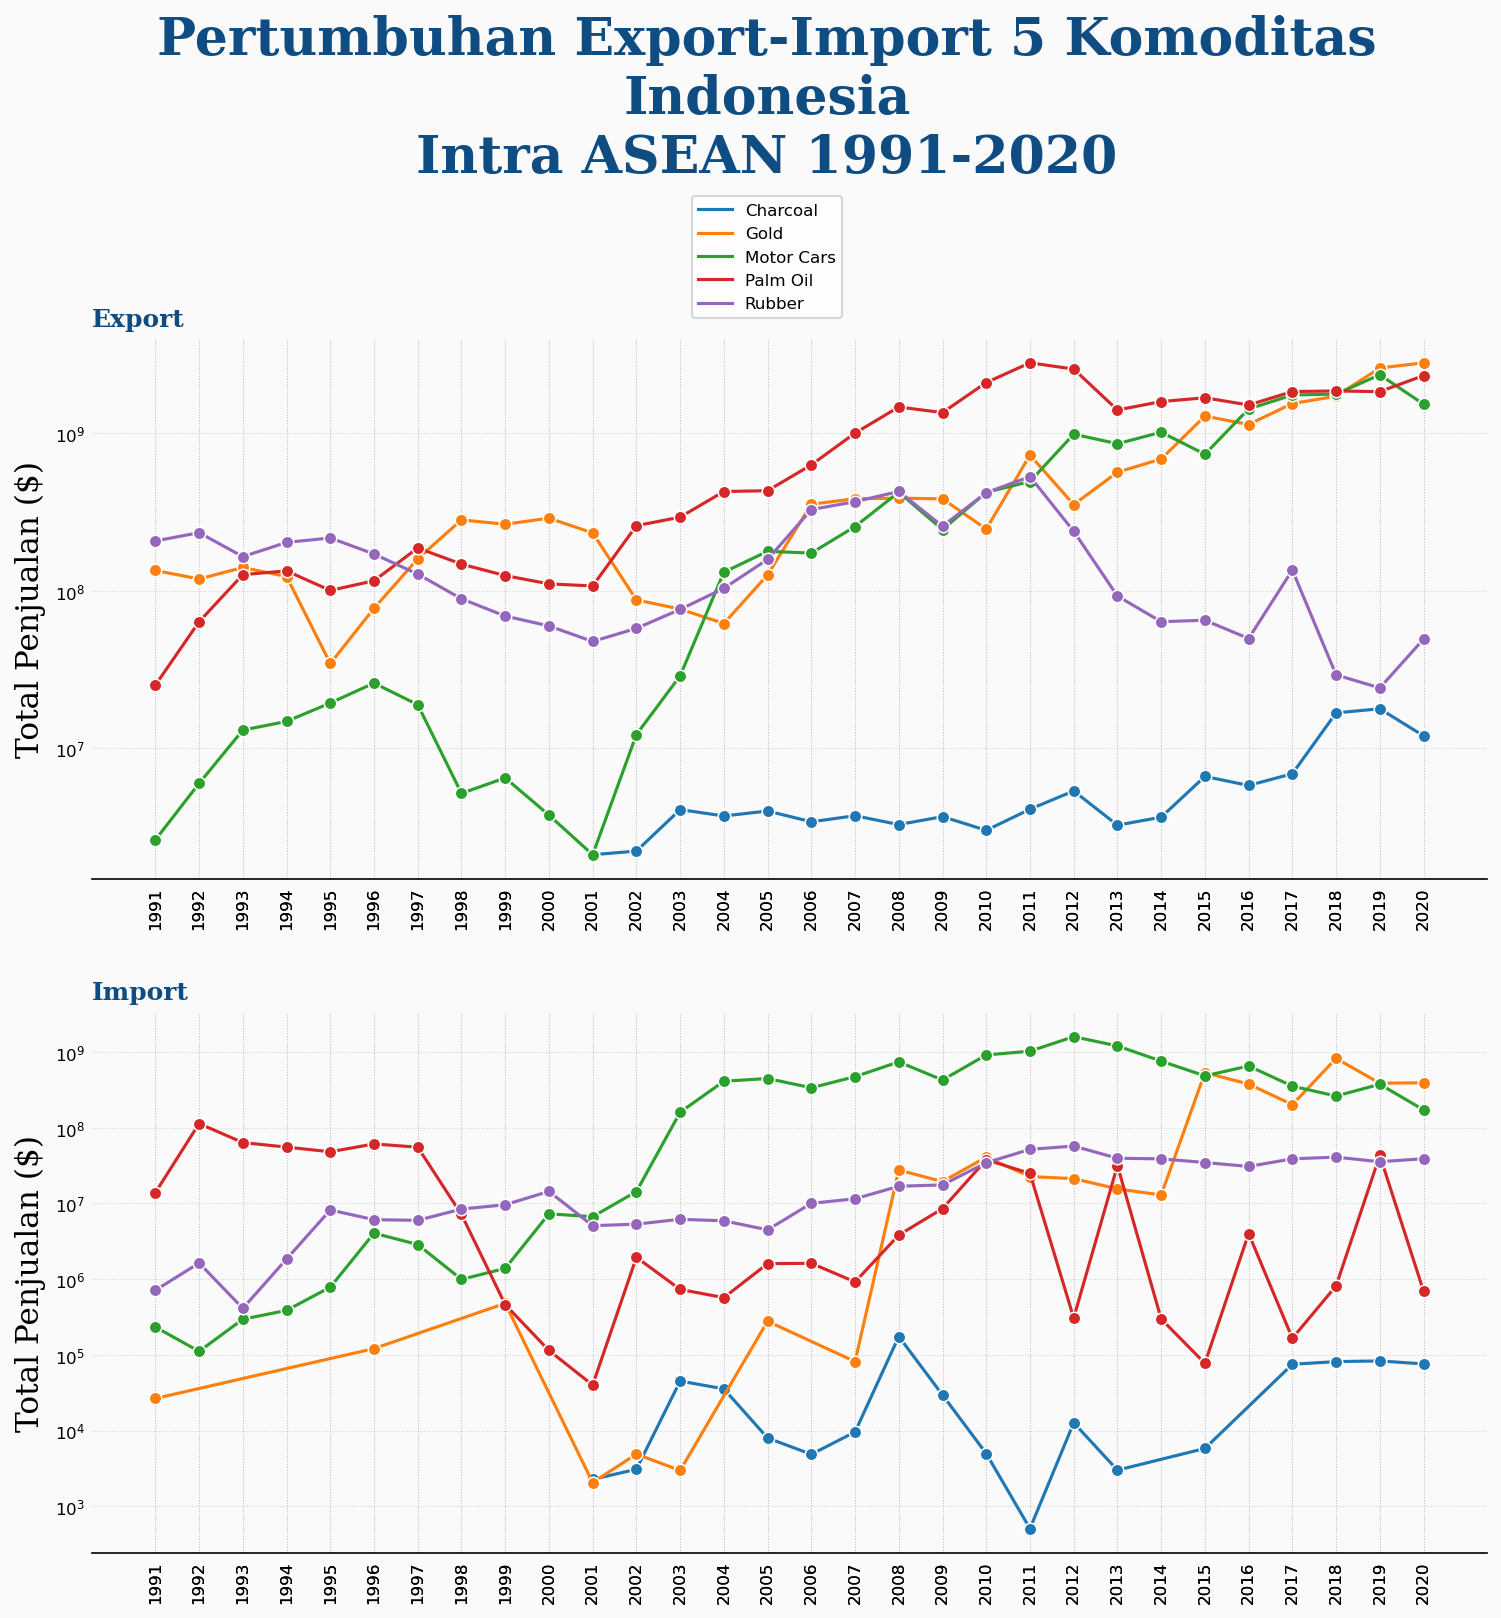

Executing shutdown due to inactivity...
Executing shutdown due to inactivity...


2021-10-18 21:32:43,673 - INFO     - Executing shutdown due to inactivity...


In [101]:
# Plot Setting
fig = plt.figure(figsize = (12,12), dpi=150, facecolor='#fafafa')
gs = fig.add_gridspec(4,3)
gs.update(wspace=0.2, hspace=0.65)

#plot 1
ax1 = fig.add_subplot(gs[0:2,0:4])
sns.lineplot(data=df_konten3.query('`Trade Flow` == "Export"'), x='Year', y='Trade Value (US$)', hue='Commodity', ax=ax1, marker='o')
ax1.set_ylabel('Total Penjualan ($)', fontfamily='serif', fontsize=15)
ax1.set_title("Export", loc='left', fontsize=12, fontweight='bold', fontfamily='serif',color='#0f4c81')
plt.xticks(df_konten2['Year'])
plt.xticks(rotation='vertical')
plt.yscale('log')
plt.grid(alpha=0.5, linestyle=':', linewidth=0.5)
fig.suptitle('Pertumbuhan Export-Import 5 Komoditas\nIndonesia\nIntra ASEAN 1991-2020', fontsize=25, fontweight='bold', fontfamily='serif',color='#0f4c81')
fig.subplots_adjust(top=0.8)
fig.legend(loc='center', bbox_to_anchor=(0.5,0.845), prop={'size':8})


#plot 2
ax2 = fig.add_subplot(gs[2:4,0:4])
sns.lineplot(data=df_konten3.query('`Trade Flow` == "Import"'), x='Year', y='Trade Value (US$)', hue='Commodity', ax=ax2, marker='o')
ax2.set_ylabel('Total Penjualan ($)', fontfamily='serif', fontsize=15)
ax2.set_title("Import", loc='left', fontsize=12, fontweight='bold', fontfamily='serif',color='#0f4c81')
plt.xticks(df_konten2['Year'])
plt.xticks(rotation='vertical')
plt.yscale('log')
plt.grid(alpha=0.5, linestyle=':', linewidth=0.5)

#tidy up
for axes in range(1,3):
    locals()['ax'+str(axes)].legend().set_visible(False)
    locals()['ax'+str(axes)].set_xlabel('')
    locals()['ax'+str(axes)].set_facecolor("#fafafa")
    locals()['ax'+str(axes)].tick_params(axis=u'both', which=u'both', length=0, labelsize=8)
    for sp in ['top', 'right', 'left']:
        locals()['ax'+str(axes)].spines[sp].set_visible(False)


plt.show()